In [5]:
from transformer_src.tokenizer import (
    DNATokenizer, 
    PRETRAINED_INIT_CONFIGURATION, 
    PRETRAINED_VOCAB_FILES_MAP, 
    PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES, 
    VOCAB_KMER
)
import numpy as np
import torch
import sklearn
import sklearn.metrics as metrics
import transformer_src

model = "dna6"

In [6]:
sample = "GTAGGT TAGGTG AGGTGG GGTGGA GTGGAA TGGAAT GGAATA GAATAC AATACG ATACGG TACGGG ACGGGG CGGGGC GGGGCA GGGCAG GGCAGC GCAGCC CAGCCA AGCCAC GCCACG CCACGG CACGGA ACGGAG CGGAGG GGAGGA GAGGAA AGGAAT GGAATC GAATCG AATCGG ATCGGG TCGGGG CGGGGG GGGGGC GGGGCG GGGCGA GGCGAG GCGAGG CGAGGC GAGGCG AGGCGC GGCGCG GCGCGG CGCGGA GCGGAG CGGAGA GGAGAG GAGAGG AGAGGC GAGGCC AGGCCC GGCCCC GCCCCG CCCCGG CCCGGA CCGGAT CGGATG GGATGC GATGCA ATGCAG TGCAGC GCAGCG CAGCGG AGCGGT GCGGTC CGGTCC GGTCCC GTCCCG TCCCGC CCCGCC CCGCCC CGCCCC GCCCCG CCCCGA CCCGAG CCGAGA CGAGAA GAGAAC AGAACG GAACGG AACGGA ACGGAG CGGAGC GGAGCG GAGCGC AGCGCG GCGCGC CGCGCG GCGCGG CGCGGA GCGGAA CGGAAC GGAACC GAACCG AACCGG ACCGGC CCGGCG CGGCGC GGCGCA GCGCAG CGCAGG GCAGGC CAGGCC AGGCCT GGCCTC GCCTCC CCTCCG CTCCGA TCCGAG CCGAGG CGAGGC GAGGCT AGGCTT GGCTTC GCTTCC CTTCCA TTCCAG TCCAGC CCAGCC CAGCCG AGCCGA GCCGAG CCGAGA CGAGAC GAGACG AGACGG GACGGC ACGGCA CGGCAC GGCACC GCACCC CACCCA ACCCAG CCCAGG CCAGGT CAGGTT AGGTTT GGTTTC GTTTCC TTTCCC TTCCCG TCCCGA CCCGAG CCGAGC CGAGCA GAGCAG AGCAGG GCAGGG CAGGGT AGGGTC GGGTCT GGTCTG GTCTGA TCTGAG CTGAGG TGAGGC GAGGCT AGGCTC GGCTCC GCTCCA CTCCAA TCCAAG CCAAGG CAAGGA AAGGAC AGGACA GGACAT GACATC ACATCC CATCCC ATCCCG TCCCGG CCCGGC CCGGCG CGGCGG GGCGGC GCGGCG CGGCGA GGCGAG GCGAGA CGAGAA GAGAAG AGAAGG GAAGGC AAGGCG AGGCGC GGCGCC GCGCCG CGCCGA GCCGAG CCGAGA CGAGAG GAGAGA AGAGAC GAGACC AGACCT GACCTG ACCTGC CCTGCC CTGCCC TGCCCG GCCCGG CCCGGG CCGGGT CGGGTC GGGTCC GGTCCC GTCCCG TCCCGA CCCGAG CCGAGC CGAGCC GAGCCC AGCCCC GCCCCG CCCCGA CCCGAC CCGACC CGACCG GACCGC ACCGCA CCGCAG CGCAGC GCAGCC CAGCCC AGCCCC GCCCCA CCCCAG CCCAGC CCAGCT CAGCTC AGCTCC GCTCCC CTCCCG TCCCGC CCCGCC CCGCCG CGCCGA GCCGAG CCGAGG CGAGGC GAGGCC AGGCCC GGCCCT GCCCTG CCCTGG CCTGGA CTGGAA TGGAAA GGAAAG GAAAGG AAAGGC AAGGCG AGGCGG GGCGGG GCGGGG CGGGGG GGGGGA GGGGAG GGGAGA GGAGAC GAGACG AGACGC GACGCG ACGCGC CGCGCG GCGCGG CGCGGC GCGGCG CGGCGG GGCGGC GCGGCG CGGCGC GGCGCG GCGCGC CGCGCG GCGCGG CGCGGT GCGGTC CGGTCA GGTCAA GTCAAA TCAAAT CAAATT AAATTC AATTCC ATTCCT TTCCTC TCCTCA CCTCAG CTCAGG TCAGGC CAGGCA AGGCAC GGCACC GCACCC CACCCA ACCCAA CCCAAT CCAATG CAATGC AATGCA ATGCAG TGCAGT GCAGTT CAGTTC AGTTCC GTTCCC TTCCCG TCCCGG CCCGGC CCGGCT CGGCTG GGCTGC GCTGCA CTGCAA TGCAAA GCAAAA CAAAAA AAAAAC AAAACA AAACAC AACACG ACACGG CACGGG ACGGGA CGGGAG GGGAGA GGAGAC GAGACA AGACAG GACAGG ACAGGA CAGGAG AGGAGA GGAGAG GAGAGG AGAGGA GAGGAG AGGAGG GGAGGG GAGGGA AGGGAG GGGAGG GGAGGG GAGGGT AGGGTC GGGTCT GGTCTG GTCTGC TCTGCA CTGCAA TGCAAC GCAACC CAACCC AACCCA ACCCAG CCCAGG CCAGGC CAGGCG AGGCGG GGCGGG GCGGGG CGGGGC GGGGCA GGGCAA GGCAAG GCAAGT CAAGTG AAGTGC AGTGCG GTGCGC TGCGCC GCGCCC CGCCCT GCCCTC CCCTCA CCTCAA CTCAAG TCAAGG CAAGGC AAGGCC AGGCCG GGCCGT GCCGTG CCGTGG CGTGGC GTGGCG TGGCGA GGCGAG GCGAGC CGAGCC GAGCCG AGCCGG GCCGGG CCGGGG CGGGGC GGGGCG GGGCGC GGCGCA GCGCAG CGCAGG GCAGGA CAGGAC AGGACA GGACAC GACACG ACACGG CACGGC ACGGCA CGGCAA GGCAAG GCAAGG CAAGGC AAGGCC AGGCCC GGCCCC GCCCCT CCCCTG CCCTGA CCTGAG CTGAGC TGAGCC GAGCCG AGCCGC GCCGCC CCGCCC CGCCCA GCCCAC CCCACG CCACGC CACGCA ACGCAG CGCAGG GCAGGT CAGGTT AGGTTT GGTTTC GTTTCC TTTCCC TTCCCG TCCCGA CCCGAC CCGACG CGACGT GACGTT ACGTTC CGTTCT GTTCTC TTCTCG TCTCGC CTCGCA TCGCAG CGCAGA GCAGAA CAGAAA AGAAAA GAAAAG AAAAGG AAAGGT AAGGTA AGGTAA GGTAAA GTAAAG TAAAGC AAAGCG AAGCGG AGCGGC GCGGCA CGGCAC GGCACC GCACCC CACCCC ACCCCG CCCCGC CCCGCC CCGCCC CGCCCC GCCCCC CCCCCA CCCCAG CCCAGT CCAGTT CAGTTC AGTTCC GTTCCG TTCCGC TCCGCC CCGCCC CGCCCG GCCCGT CCCGTC CCGTCC CGTCCC"
vocab = PRETRAINED_VOCAB_FILES_MAP["vocab_file"][model]
config = PRETRAINED_INIT_CONFIGURATION[model]["do_lower_case"]
max_len = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES[model]
tkr = DNATokenizer(vocab, config, max_len)

In [7]:
tokenized = tkr.tokenize(sample)
IDs = [tkr._convert_token_to_id(token) for token in tokenized]
retokenized = [tkr._convert_id_to_token(iD) for iD in IDs]
assert(tokenized == retokenized)

In [8]:
from transformer_src.data_dnabert import SupervisedDataset
import csv

test_dataset = SupervisedDataset("../data/test.tsv", tkr)
val_dataset = SupervisedDataset("../data/val.tsv", tkr, kmer=6)


Perform single sequence classification...
Tokenizing input with 6-mer as input...
Perform single sequence classification...
Tokenizing input with 6-mer as input...


In [10]:
data_path = "../data/val.tsv"
with open(data_path, 'r', newline='\n') as file:
    reader = csv.reader(file, delimiter='\t')
    first_five = list(reader)[1:5]

for line in first_five:
    print(line)

import numpy as np
first_five = np.array(first_five)
labels = first_five[:, 1]
print(labels)

labels = labels[1:]
print(labels)


output = tkr(
            list(first_five[:,0]),
            return_tensors="pt",
            padding="longest",
            max_length=tkr.model_max_length,
            truncation=True,
)
output_ids = output["input_ids"]
print(output_ids)

['GAAACA AAACAC AACACC ACACCT CACCTT ACCTTC CCTTCT CTTCTA TTCTAC TCTACA CTACAT TACATT ACATTG CATTGC ATTGCC TTGCCT TGCCTG GCCTGC CCTGCC CTGCCT TGCCTA GCCTAA CCTAAA CTAAAT TAAATG AAATGG AATGGT ATGGTT TGGTTT GGTTTG GTTTGT TTTGTC TTGTCT TGTCTC GTCTCT TCTCTG CTCTGC TCTGCA CTGCAA TGCAAT GCAATC CAATCA AATCAA ATCAAT TCAATC CAATCT AATCTC ATCTCT TCTCTC CTCTCT TCTCTA CTCTAT TCTATT CTATTC TATTCT ATTCTT TTCTTT TCTTTA CTTTAA TTTAAA TTAAAA TAAAAC AAAACA AAACAG AACAGA ACAGAA CAGAAT AGAATT GAATTA AATTAG ATTAGG TTAGGA TAGGAT AGGATA GGATAA GATAAT ATAATT TAATTT AATTTG ATTTGC TTTGCA TTGCAT TGCATA GCATAA CATAAT ATAATT TAATTG AATTGT ATTGTT TTGTTT TGTTTC GTTTCT TTTCTT TTCTTG TCTTGT CTTGTC TTGTCT TGTCTC GTCTCA TCTCAG CTCAGA TCAGAG CAGAGA AGAGAA GAGAAA AGAAAT GAAATC AAATCT AATCTT ATCTTA TCTTAC CTTACA TTACAG TACAGG ACAGGG CAGGGA AGGGAG GGGAGG GGAGGC GAGGCT AGGCTG GGCTGT GCTGTC CTGTCT TGTCTC GTCTCC TCTCCA CTCCAG TCCAGA CCAGAT CAGATA AGATAA GATAAC ATAACC TAACCA AACCAG ACCAGC CCAGCA CAGCAG AGCAGC GCAGCC CAGCCT AGCC

In [11]:
print(type(val_dataset.labels))
val_dataset.labels = (val_dataset.labels).astype(np.int8)
if -1 in val_dataset.labels:
    print("add")
    val_dataset.labels += 1
print(val_dataset.labels)
np.count_nonzero(val_dataset.labels == 1)

<class 'numpy.ndarray'>
[0 0 0 ... 1 1 1]


19578

In [12]:
# Test out Tokenizer
to_id = tkr.vocab
to_tk = tkr.ids_to_tokens

KMER="TAGATA"
print(to_id[KMER])
assert to_tk[to_id[KMER]] == KMER

KMER="[UNK]"
print(to_id[KMER])
assert to_tk[to_id[KMER]] == KMER

1225
1


In [13]:
DATA_PATH="../data/"
MODEL_PATH="pretrained_6mer/pytorch_model.bin"
CONFIG_FILE="pretrained_6mer/"

import transformers
import json

with open("labels.json", "r") as jfile:
        data = json.load(jfile)

label2id = data.get("label2id", {})
id2label = {v: k for k, v in label2id.items()}

# load model
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    CONFIG_FILE,
    cache_dir=None,
    num_labels=3,
    trust_remote_code=True,
    id2label=id2label,
    label2id=label2id,
    output_attentions=True
)

Some weights of the model checkpoint at pretrained_6mer/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at pretrained_6mer/ and are new

In [14]:
from peft import (
    LoraConfig,
    get_peft_model,
    get_peft_model_state_dict,
    PeftConfig,
    PeftModel
)

PEFT_CONFIG = "../output/best_berten_718"
config = PeftConfig.from_pretrained(PEFT_CONFIG)
inference_model = PeftModel.from_pretrained(model, PEFT_CONFIG)

In [15]:
from torch.utils.data import DataLoader
torch.cuda.empty_cache()
print(test_dataset.input_ids)
test_labels = np.asarray(test_dataset.labels)
pos_test_ind = np.where(test_labels != 1)
pos_labels = test_labels[pos_test_ind]

pos_test_inputs = test_dataset.input_ids[pos_test_ind]
# with torch.no_grad():
#     pos_test_outputs = inference_model(pos_test_inputs)

outputs = inference_model(pos_test_inputs[0:32])

tensor([[   2, 3394, 1276,  ..., 2783, 2927,    3],
        [   2, 3149,  295,  ..., 1305, 1109,    3],
        [   2, 1540, 2050,  ...,  349, 1383,    3],
        ...,
        [   2, 1634, 2427,  ..., 2110,  236,    3],
        [   2, 2315, 1055,  ..., 1640, 2449,    3],
        [   2,   56,  210,  ..., 1060,  129,    3]])


In [16]:
# logits = [o.logits for o in all_outputs]
# auc_poised = metrics.roc_auc_score((labels == 0), logits[:,0])
# auc_active = metrics.roc_auc_score((labels == 2), logits[:,2])

out_logits = outputs.logits.detach().numpy()
out_attens = outputs.attentions

out_preds = np.argmax(out_logits, 1)
print(out_preds)
print(pos_labels[0:32])
print(out_logits)

[2 1 1 0 0 2 0 0 2 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 2 0 1]
[0 0 2 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0]
[[ 1.4694904  -3.715859    1.6319729 ]
 [ 0.22450462  1.1266026  -1.344702  ]
 [-0.6582938   1.5553082  -0.9183842 ]
 [ 0.27008897 -0.4446012  -0.2815431 ]
 [ 1.1717923  -1.3785945   0.06456447]
 [ 0.6867998  -2.008314    0.6939264 ]
 [ 0.6102344  -0.85901725 -0.38486955]
 [ 0.6075369   0.08034042 -1.0003251 ]
 [-0.5651592  -0.05489397  0.43435127]
 [ 0.07853912  0.08618436 -0.51036143]
 [-0.16174465 -0.03168217 -0.22989938]
 [-1.4850552   0.87799644  0.45472038]
 [ 1.4103605  -2.1115088   0.0572914 ]
 [ 1.2462633  -2.7270896   0.8862874 ]
 [ 0.21150273  0.13649042 -0.72857875]
 [ 0.16674441 -0.4823397  -0.12227949]
 [ 0.35433474  0.8688714  -1.1121366 ]
 [ 1.9824594  -2.26495    -0.19846585]
 [ 0.150716    0.39757645 -0.73402613]
 [ 0.7297761  -0.6467593  -0.6782571 ]
 [ 0.8585761  -1.0916729  -0.11340973]
 [-0.69404995  1.1850083  -0.6181369 ]
 [-0.74174

In [17]:
print(out_attens[0].size())

torch.Size([32, 12, 496, 496])


In [25]:
def process_scores(attention_scores, kmer):
    scores = np.zeros([attention_scores.shape[0], attention_scores.shape[-1]])

    # attention_scores: (batch_size, num_heads, seq_len, seq_len)
    for index, attention_score in enumerate(attention_scores):
        attn_score = []
        # print(attention_score.shape)
        for i in range(1, attention_score.shape[-1] - kmer + 2):
            attn_score.append(float(attention_score[:, 0, i].sum()))

        for i in range(len(attn_score) - 1):
            if attn_score[i + 1] == 0:
                attn_score[i] = 0
                break
        
        # print(len(attn_score))

        # attn_score[0] = 0
        counts = np.zeros([len(attn_score) + kmer - 1])
        real_scores = np.zeros([len(attn_score) + kmer - 1])
        for i, score in enumerate(attn_score):
            for j in range(kmer):
                counts[i + j] += 1.0
                real_scores[i + j] += score
        real_scores = real_scores / counts
        real_scores = real_scores / np.linalg.norm(real_scores)

        scores[index] = real_scores
    return scores

def process_multi_score(attention_scores, kmer):
    scores = np.zeros([attention_scores.shape[0], attention_scores.shape[1], attention_scores.shape[-1]])

    # attention_scores: (batch_size, num_heads, seq_len, seq_len)
    for index, attention_score in enumerate(attention_scores):

        head_scores = np.zeros([attention_scores.shape[1], attention_scores.shape[-1]])
        for head in range(0, len(attention_score)):
            attn_score = []
            
            for i in range(1, attention_score.shape[-1] - kmer + 2):
                attn_score.append(float(attention_score[head, 0, i]))

            for i in range(len(attn_score) - 1):
                if attn_score[i + 1] == 0:
                    attn_score[i] = 0
                    break
    
            counts = np.zeros([len(attn_score) + kmer - 1])
            real_scores = np.zeros([len(attn_score) + kmer - 1])

            for i, score in enumerate(attn_score):
                for j in range(kmer):
                    counts[i + j] += 1.0
                    real_scores[i + j] += score
            real_scores = real_scores / counts
            real_scores = real_scores / np.linalg.norm(real_scores)

            head_scores[head] = real_scores

        scores[index] = head_scores
    return scores


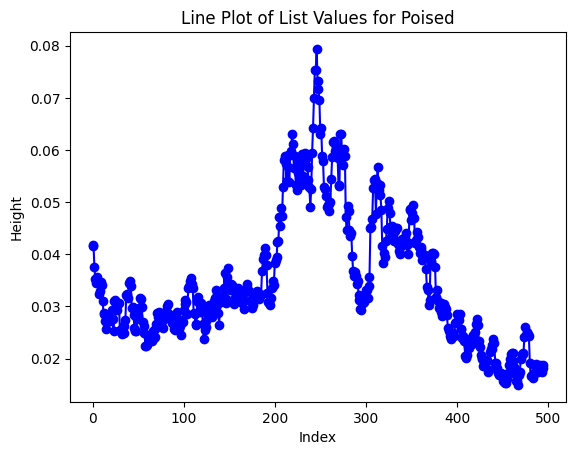

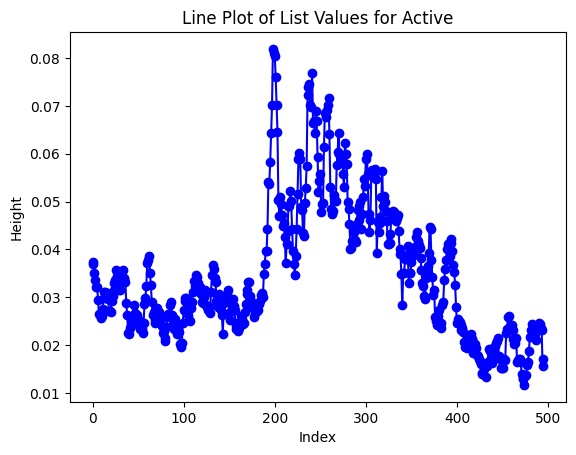

In [38]:
import matplotlib.pyplot as plt

colors = [
    'blue',        # Blue
    'green',       # Green
    'red',         # Red
    'purple',      # Purple
    'orange',      # Orange
    'brown',       # Brown
    'pink',        # Pink
    'gray',        # Gray
    'olive',       # Olive
    'cyan',        # Cyan
    'magenta',     # Magenta
    'teal'         # Teal
]

def plot_line(values, name):
    x_values = list(range(len(values)))

    # Create the plot
    plt.plot(x_values, values, marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Height')
    plt.title(f'Line Plot of List Values for {name}')

    # Show the plot
    plt.show()

def plot_multi_line(list_values):
    x_values = list(range(len(list_values[0])))

    # Create the plot
    for values, color in zip(list_values, colors):
        plt.plot(x_values, values, marker='o', linestyle='-', color=color)

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Height')
    plt.title(f'Plot all Attention Heads')

    # Show the plot
    plt.show()




atten_scores = (out_attens[-1]).numpy()
procs_scores = process_scores(atten_scores, 6)
values = procs_scores[31]
poised_indices = np.where(test_labels[0:32] == 0)
active_indices = np.where(test_labels[0:32] == 2)
val_poised = np.average(procs_scores[poised_indices], 0)
val_active = np.average(procs_scores[active_indices], 0)

plot_line(val_poised, "Poised")
plot_line(val_active, "Active")



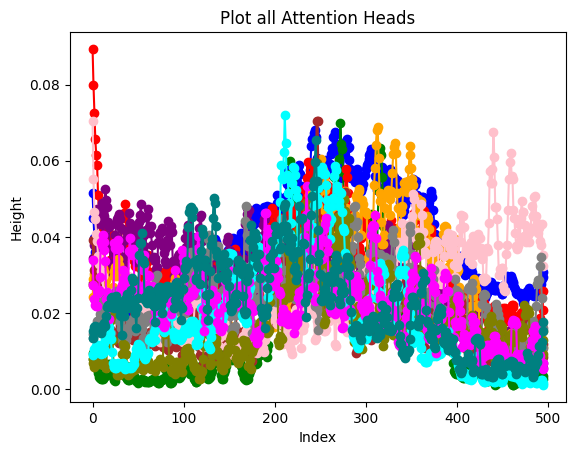

In [39]:
multi_attn_result = process_multi_score((out_attens[-1]).numpy(), kmer=6)
multi_average = np.average(multi_attn_result, 0)
plot_multi_line(multi_average)



In [19]:
def calculate_metric_with_sklearn(logits: np.ndarray, labels: np.ndarray):
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": sklearn.metrics.accuracy_score(labels, predictions),
        "f1": sklearn.metrics.f1_score(
            labels, predictions, average="macro", zero_division=0
        ),
        "matthews_correlation": sklearn.metrics.matthews_corrcoef(labels, predictions),
        "precision": sklearn.metrics.precision_score(
            labels, predictions, average="macro", zero_division=0
        ),
        "recall": sklearn.metrics.recall_score(
            labels, predictions, average="macro", zero_division=0
        ),
        "AUC_score_0":
        ## Expects that labels are provided in a one-hot encoded format.
        sklearn.metrics.roc_auc_score((labels == 0), logits[:, 0]),
        "AUC_score_2":
        ## Expects that labels are provided in a one-hot encoded format.
        sklearn.metrics.roc_auc_score((labels == 2), logits[:, 2]),
    }


def compute_auc_fpr_thresholds(logits, labels):
    ## class 0
    [fprs0, tprs0, thrs0] = sklearn.metrics.roc_curve((labels == 0), logits[:, 0])
    sort_ix = np.argsort(np.abs(fprs0 - 0.1))
    fpr10_0 = thrs0[sort_ix[0]]
    sort_ix = np.argsort(np.abs(fprs0 - 0.05))
    fpr05_0 = thrs0[sort_ix[0]]
    sort_ix = np.argsort(np.abs(fprs0 - 0.03))
    fpr03_0 = thrs0[sort_ix[0]]
    sort_ix = np.argsort(np.abs(fprs0 - 0.01))
    fpr01_0 = thrs0[sort_ix[0]]

    ## class 2
    [fprs2, tprs2, thrs2] = sklearn.metrics.roc_curve((labels == 2), logits[:, 2])
    sort_ix = np.argsort(np.abs(fprs2 - 0.1))
    fpr10_2 = thrs2[sort_ix[0]]
    sort_ix = np.argsort(np.abs(fprs2 - 0.05))
    fpr05_2 = thrs2[sort_ix[0]]
    sort_ix = np.argsort(np.abs(fprs2 - 0.03))
    fpr03_2 = thrs2[sort_ix[0]]
    sort_ix = np.argsort(np.abs(fprs2 - 0.01))
    fpr01_2 = thrs2[sort_ix[0]]

    predictions = np.argmax(logits, axis=-1)

    return {
        "accuracy": sklearn.metrics.accuracy_score(labels, predictions),
        "AUC_score_0":
        ## Expects that labels are provided in a one-hot encoded format.
        sklearn.metrics.roc_auc_score((labels == 0), logits[:, 0]),
        "AUC_score_2":
        ## Expects that labels are provided in a one-hot encoded format.
        sklearn.metrics.roc_auc_score((labels == 2), logits[:, 2]),
        "FPR_Thresholds_0": [fpr10_0, fpr05_0, fpr03_0, fpr01_0],
        "FPR_Thresholds_2": [fpr10_2, fpr05_2, fpr03_2, fpr01_2],
    }


"""
Compute metrics used for huggingface trainer.
"""


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    return calculate_metric_with_sklearn(logits, labels)


def compute_final_metrics(eval_pred):
    logits, labels = eval_pred
    return compute_auc_fpr_thresholds(logits, labels)

In [22]:

trainer = transformers.Trainer(inference_model, compute_metrics=compute_metrics)
print(trainer.compute_metrics)
trainer.compute_metrics = compute_final_metrics
print(trainer.compute_metrics)

<function compute_metrics at 0x28d5f40e0>
<function compute_final_metrics at 0x28d5f4220>


ModuleNotFoundError: No module named 'tokenizer'

'/Users/pranavmahableshwarkar/CS/NIH/DNATransformerClassifier/scanner_model'